# Exploratory Analysis of Kickstarter Projects



Kickstarter, the New York-based company behind the similarly-named crowdfunding platform, is looking into launching consultating services for guiding project founders towards successful campaigns. In order to do that, it would need to first analyse the data of past crowdfunding campaigns, in order to better understand the factors that give rise to successful project launches.

## Introduction

For purpose of this exploratory analysis, we would be working with a provided data-set *DSI_kickstarterscrape_dataset.csv* as follows:

In [1]:
import pandas as pd

kickstarter_raw = pd.read_csv('DSI_kickstarterscrape_dataset.csv',encoding="latin-1")

kickstarter_raw.info()

kickstarter_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
project id           45957 non-null int64
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal                 45957 non-null float64
pledged              45945 non-null float64
funded percentage    45957 non-null float64
backers              45957 non-null int64
funded date          45957 non-null object
levels               45957 non-null int64
reward levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration             45957 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.0+ MB


,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [2]:
print('Distribution of project status:')
print(kickstarter_raw.loc[:,'status'].value_counts())
kickstarter_raw['funded date'] = pd.to_datetime(kickstarter_raw.loc[:,'funded date'])
print('\n\nDistribution of project funded dates:')
print(kickstarter_raw.loc[:,'funded date'].describe())

Distribution of project status:
successful    22969
failed        18996
live           3929
canceled         59
suspended         4
Name: status, dtype: int64


Distribution of project funded dates:
count                         45957
unique                        41068
top       2012-01-01 04:59:00+00:00
freq                             44
first     2009-05-03 06:59:59+00:00
last      2012-08-01 19:36:12+00:00
Name: funded date, dtype: object


Prelimary inspection of the data-set reveals 45,957 projects being snapshot at various funding stages across three and a half years, with data-points documented across 17 columns. Column details as follows:

| Column | Description |
|--------|-------------|
|project id | Arbitrary project id number |
| name | Project name |
| url | Web address of project on Kickstarter platform |
| category | 1st level categorisation of project |
| subcategory | 2nd level categorisation of project |
| location | Geological location of project be executed |
| status | Current funding stage of project |
| goal | Financial goal set by project founder for defining a successfully funded project |
| pledged | Current amount of funds being pledged |
| funded percentage | Proportion of funding goal achieved |
| backers | Number of backers |
| funded date | Date/Time upon which contributed funds are finalized (GMT) |
| levels | Number of reward tiers |
| reward levels | Financial quantum of every reward tier |
| updates | Number of project updates published by project founder |
| comments | Number of comments posted by backers |
| duration | Number of days in project funding campaign |

Next we inspect the *categories* column:

In [3]:
print('Distribution of project status:')
print(kickstarter_raw.loc[:,'category'].value_counts())

Distribution of project status:
Film &amp; Video    13053
Music               10913
Publishing           4770
Art                  3992
Theater              2492
Design               1768
Games                1738
Photography          1514
Food                 1439
Fashion              1136
Comics               1072
Technology            811
Dance                 761
Film & Video          498
Name: category, dtype: int64


There is another duplicate entry for *Film & Video*, due to incorrect escaping of the ampersand character. Once the wrong value has been replaced, we should be getting 13,551 rows for projects under *Film & Video*. Rectification is carried out as follows:

In [4]:
replacement_dict = {'Film &amp; Video': 'Film & Video'}

kickstarter_raw.loc[:,'category'].replace(replacement_dict, inplace=True)

print('Distribution of project status:')
print(kickstarter_raw.loc[:,'category'].value_counts())

Distribution of project status:
Film & Video    13551
Music           10913
Publishing       4770
Art              3992
Theater          2492
Design           1768
Games            1738
Photography      1514
Food             1439
Fashion          1136
Comics           1072
Technology        811
Dance             761
Name: category, dtype: int64


## Part 1: Foundational Data Analysis
***


### What is the mean (total) pledge that projects get?

In [5]:
kickstarter_raw.loc[:,'pledged'].mean()

4980.749678963979

Considering all projects in the data-set regardless of the project-status, the mean amount pledged is $4,980.75.

In [6]:
kickstarter_raw.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


### Create a histogram that shows the distribution for number of backers. What is the skew of the distribution?

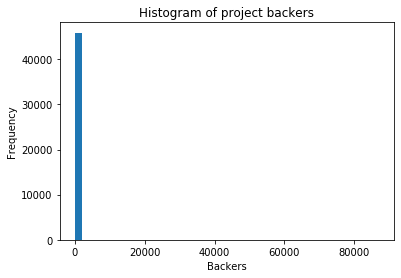

In [7]:
# plot out histogram with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(kickstarter_raw.loc[:,'backers'], bins=40)
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Histogram of project backers')

plt.show()

Plotting of histogram reveals a high column in the 0-2000 backers bin, with x-axis limits indicating possible outliers reaching a maximum of close to 80,000 backers. We could utilise z-scores as a way to exclude outliers:

In [8]:
from scipy import stats
import numpy as np

# Utilising z-scores as a way to identify outliers
# ------------------------------------------------
# Any value that deviates from mean by more than 3 standard deviations
# will be flagged out as an outlier, i.e. z-score > 3. In other words,
# we will re-plot the histogram considering only non-outliers.

z_score_values=np.abs(stats.zscore(kickstarter_raw.loc[:,'backers']))

# create a new column to hold z-scores
kickstarter_raw['z-score'] = pd.Series(z_score_values)

# identify outliers (z-score exceeding 3)
outliers = kickstarter_raw.loc[kickstarter_raw.loc[:,'z-score'] > 3,:]

# brief count and inspection of backer-count for outliers
outliers.loc[:,'backers'].describe()

count       91.000000
mean      7729.802198
std      13230.321851
min       2136.000000
25%       2696.000000
50%       3915.000000
75%       5545.000000
max      87142.000000
Name: backers, dtype: float64

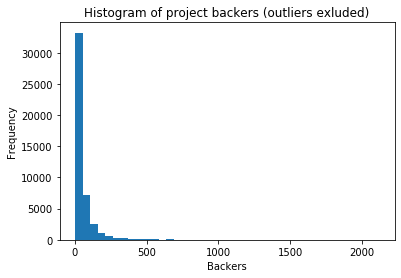

In [9]:
# filter out non-outliers (z-score within 3)
non_outliers = kickstarter_raw.loc[kickstarter_raw.loc[:,'z-score'] <= 3,:]

#fig, ax = plt.subplots()
#ax.hist(non_outliers.loc[:,'backers'], bins=40)
#ax.set_title('Distribution of project backers')

#plot histogram of project backer count
plt.hist(non_outliers.loc[:,'backers'], bins=40)
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Histogram of project backers (outliers exluded)')

plt.show()

After filtering out outliers, the distribution continues to be strongly skewed to the right, with the 0-100 backers bin occurring at highest frequency of approximately 40,000 projects. At this point, we can conclude that the distribution of backers is highly skewed to the right.

In [10]:
backer_distribution = non_outliers.loc[:,'backers'].value_counts().sort_index()
print(backer_distribution.head(20))

0     3945
1     2566
2     1924
3     1456
4     1139
5     1097
6      910
7      886
8      839
9      703
10     681
11     617
12     599
13     613
14     605
15     554
16     542
17     567
18     537
19     487
Name: backers, dtype: int64


Further inspection of non-outliers data-set reveal that a large number of projects have 0 backers.

### Is the ‘duration’ variable normally distributed?

From a visual perspective, normal distribution carries the requirement that graph takes on a bell-shaped curve, symmetric around the mean value, i.e. no bias towards its left or right side. We first inspect the histrogram of the duration plot:

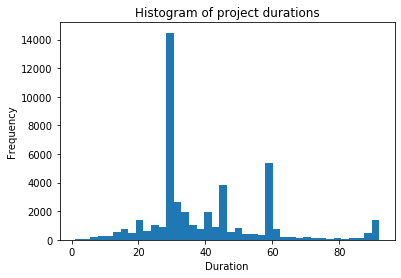

In [11]:
#plot histogram of project duration values (go back to using the raw data-set, not non-outliers)
plt.hist(kickstarter_raw.loc[:,'duration'], bins=40)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of project durations')

plt.show()

In [12]:
kickstarter_raw.loc[:,'duration'].describe()

count    45957.000000
mean        39.995547
std         17.414458
min          1.000000
25%         30.000000
50%         32.000000
75%         48.390000
max         91.960000
Name: duration, dtype: float64

To get a better perspective of how close the above histrogram is to ressembling a normal distribution, we create a reference distribution (using the [numpy.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) function) based on the actual mean, standard-deviation and population size of the kickstarter data-set:

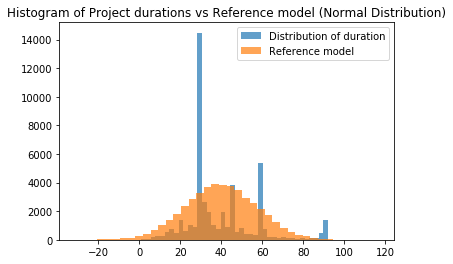

In [13]:
# Parameters from above kick-starter duration statistics
ks_mean = 39.995547
ks_stddev = 17.414458
ks_size = 45957

# create reference model
reference = np.random.normal(loc = ks_mean, scale = ks_stddev, size = ks_size)

# plot kickstarter duration histogram together with reference model
plt.hist(kickstarter_raw.loc[:,'duration'], bins = 40, alpha = 0.7, label = 'Distribution of duration')
plt.hist(reference, bins = 40, alpha = 0.7, label='Reference model')
plt.title('Histogram of Project durations vs Reference model (Normal Distribution)')
plt.legend()

plt.show()

Based on the above comparative plot, the shape of the actual distribution of duration values differs quite a bit from the reference model.

Pearson's chi-squared test can applied to sets of data to evaluate how likely it is that any observed difference between the sets arose by chance. In this case, we are interested in evaluating the project duration values alongside the reference model, i.e. a normal distribution.

The [scipy.stats.normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest) will specifically test if the duration values is different from a standard normal distribution.  This function returns a 2-tuple of the chi-squared probability, and the associated p-value. 

Given the null hypothesis that duration values came from a normal distribution, the p-value represents the largest probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. If the p-value is very small (compared against a pre-determined significance value), it means it is unlikely that the duration values came from a normal distribution.

In [14]:
from scipy import stats

# result is a 2-tuple of the chi-squared statistic, and the associated p-value
result = stats.normaltest(np.array(kickstarter_raw.loc[:,'duration']))

# significance value set at 0.001
alpha = 1e-3

print(result)
print('p-value is {0}, alpha is {1}'.format(result.pvalue, alpha))

# null hypothesis: duration is normally distributed
if result.pvalue < alpha:  
    print('The null hypothesis can be rejected. Duration values are not normally distributed.')
else:
    print('The null hypothesis cannot be rejected. Duration values are normally distributed.')

NormaltestResult(statistic=6985.5754355009585, pvalue=0.0)
p-value is 0.0, alpha is 0.001
The null hypothesis can be rejected. Duration values are not normally distributed.


Given the above results (graphical comparison, and chi-squared test for normality), we can conclude the project duration values are not normally distributed.

### If you could collect data on another attribute of these projects, what would it be and why?

Another potentially useful attribute would be the degree of sharing on social media platforms, e.g. *project ABC was mentioned in 100 shared public posts on Facebook for the duration of its fund-raising campaign*. In the current age, the easiest way to get the word out on a kickstarter project is to reach out to as many people as possible on the Internet, which is best done on social media platforms. A greater outreach could translate into attracting more backers, thus bringing a positive impact to attaining or even surpassing funding goals. In this case, we can attempt to verify if there is a correlation between social media outreach and project success.

## Part 2: Qualitative Analysis

In [15]:
import seaborn as sns

For this section, we would be using seaborn module to plot our charts.

### What's the best length of time to run a campaign?

The *duration* column provides the length of time clocked by every funding campaign in the data-set. Splitting them by *status* would give provide a clearer picture on determining if duration plays a part in the success of a campaign.

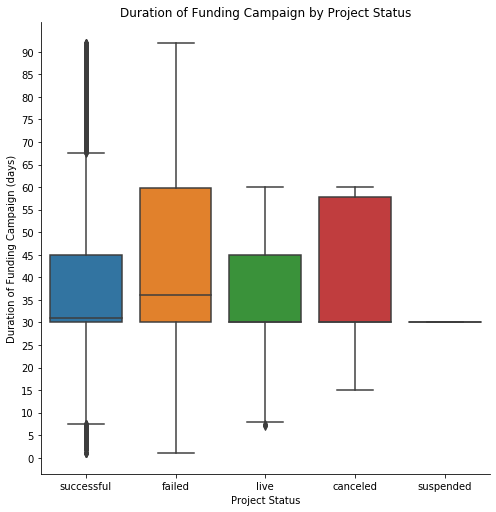

In [16]:
sns_plot = sns.catplot(x='status', y='duration', data=kickstarter_raw, kind='box', height = 7, aspect = 1)

# x-axis config
plt.xlabel('Project Status')

# y-axis config
plt.ylabel('Duration of Funding Campaign (days)')
plt.yticks(np.arange(0, 95, 5))

# general config
plt.title('Duration of Funding Campaign by Project Status')

plt.show()

sns_plot.savefig('images/duration_of_funding_campaign_by_project_status.png')

Duration of successful projects is positively skewed, with median occurring around 31 days. However, the medians mostly do not exceed the interquartile ranges of the plots, indicating that there’s no significant difference in durations of the projects with various outcomes.

In other words, duration likely has little bearing on the outcome of a funding campaign.

### What's the ideal pledge goal?

Project founders can designate a pledge quantum that determines the success of a funding campaign, and that is capture in the *goal* column. Again, by charting the mean value across the various *status* values, we can observe the a typical ideal goal of a successful campaign.

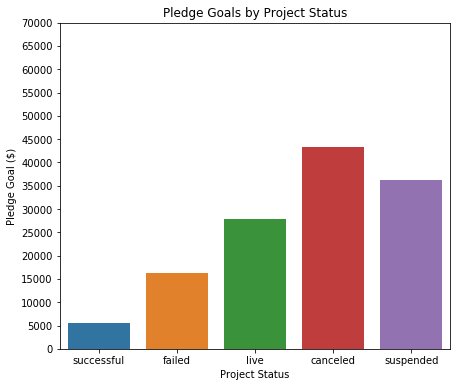

In [17]:
# pre-plot config
plt.figure(figsize=(7, 6))

# actual plot
sns_plot = sns.barplot(x='status', y='goal', data=kickstarter_raw, estimator = np.mean, ci=None)

# x-axis config
plt.xlabel('Project Status')

# y-axis config
plt.ylabel('Pledge Goal ($)')
plt.yticks(np.arange(0, 75000, 5000))

# general config
plt.title('Pledge Goals by Project Status')

plt.show()

fig = sns_plot.get_figure()
fig.savefig("images/pledge_goals_by_project_status.png")

Mean pledge goal of successful campaigns approximately $5,000.

Furthermore, it is observed that the lower the quantum of the pledge goal, the easier it is to achieve a successful campaign.

### What type of projects would be most successful at getting funded?

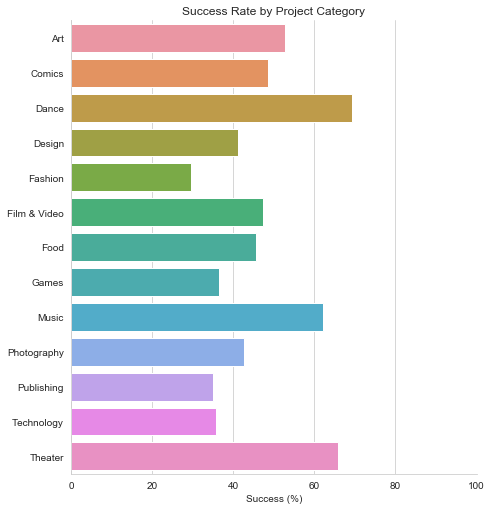

In [18]:
categories = kickstarter_raw.loc[:,'category'].unique().tolist()

success_rates = []
for cat in categories:
    num_successful_projects_in_category = len(kickstarter_raw.loc[(kickstarter_raw.loc[:,'category']==cat) & (kickstarter_raw.loc[:,'status']=='successful'),:])
    num_projects_in_category = len(kickstarter_raw.loc[(kickstarter_raw.loc[:,'category']==cat),:])
    rate = num_successful_projects_in_category / num_projects_in_category * 100
    success_rates.append(rate)
    
#print(success_rate)

success_rate_df = pd.DataFrame({'category': categories, 'success_rate': success_rates}).sort_values(by = 'category')


# pre-plot config
sns.set_style("whitegrid")

# actual plot
sns_plot = sns.catplot(y='category', x='success_rate', data = success_rate_df, kind = 'bar', ci = None, height = 7, aspect = 1)

# x-axis config
plt.xlim(0,100)
plt.xlabel('Success (%)')

# y-axis config
plt.ylabel('') # manually turn off the label

# general config
plt.title('Success Rate by Project Category')

plt.show()

sns_plot.savefig('images/success_rate_by_category.png')

Top 3 categories with highest success rates would Dance, Theater and Arts.

### Is there an ideal month/day/time to launch a campaign?

Given the *funded date* and *duration columns*, we can work out a *launch date* after factoring in the time-delta.

The *backers* column provides the total number of backers who have contributed to a particular project campaign. A high backer-count would likely translate into greater campaign success. In that case, we can attempt to analyse the best time to launch a campaign that could possibly yield the highest number of backers.

In [19]:
import datetime as dt

# convert duration to a time-delta type
temp = kickstarter_raw.loc[:,'duration'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))

# work out a new launch date column
kickstarter_raw['launch date'] = kickstarter_raw.loc[:,'funded date'] - temp

# 0 is Monday
#kickstarter_raw['day_index'] = kickstarter_raw.loc[:,'launch date'].dt.strftime('%w')

# 0 is Monday
kickstarter_raw['day'] = kickstarter_raw.loc[:,'launch date'].dt.strftime('%a')

# 1 is January
#kickstarter_raw['month_index'] = kickstarter_raw.loc[:,'launch date'].dt.strftime('%m').astype(int)

# 1 is January
kickstarter_raw['month'] = kickstarter_raw.loc[:,'launch date'].dt.strftime('%b')

# 0 is 12 midnight
kickstarter_raw['hour'] = kickstarter_raw.loc[:,'launch date'].dt.strftime('%H').astype(int)

# quick sanity check on above computation
kickstarter_raw.loc[:,['name','funded date','duration','launch date', 'day', 'month', 'hour']].head(3)

,name,funded date,duration,launch date,day,month,hour
0,WHILE THE TREES SLEEP,2011-08-19 19:28:17+00:00,30.00,2011-07-20 19:28:17+00:00,Wed,Jul,19
1,Educational Online Trading Card Game,2010-08-02 03:59:00+00:00,47.18,2010-06-15 03:59:00+00:00,Tue,Jun,3
2,STRUM,2012-06-08 00:00:31+00:00,28.00,2012-05-11 00:00:31+00:00,Fri,May,0


With the additional columns, we can now chart the average backer count across the various aspects of time, starting with Day-of-week:

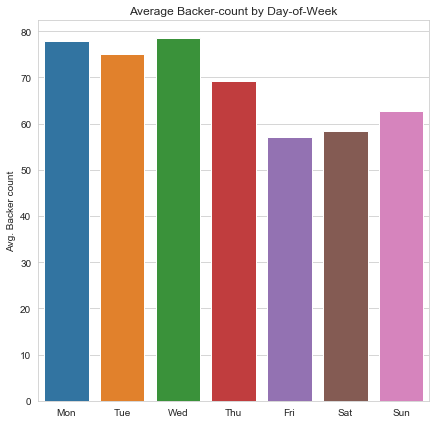

In [20]:
fig, ax = plt.subplots(figsize = (7, 7))

#sns_plot = sns.catplot(x='day_index', y='backers', data=kickstarter_raw.loc[kickstarter_raw.loc[:,'status']=='successful',:], kind='box', height = 7, aspect = 1)
day_of_week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns_plot = sns.barplot(x = 'day', y = 'backers', order = day_of_week, data=kickstarter_raw.loc[:,:], estimator = np.mean, ci = None)

# x-axis config
plt.xlabel('')

# y-axis config
plt.ylabel('Avg. Backer count')
#plt.yticks(np.arange(0, 130))

# general config
plt.title('Average Backer-count by Day-of-Week')

plt.show()

fig = sns_plot.get_figure()
fig.savefig("images/avg_backer_count_by_day_of_week.png")

Above chart indicates that launching a project in the 1st half of the week (Wednesday to be exact) would yield the highest possible number of backers. In contrast, 2nd half of the week (particularly Friday) would not be a good move.

Next we take a look at Month-of-year:

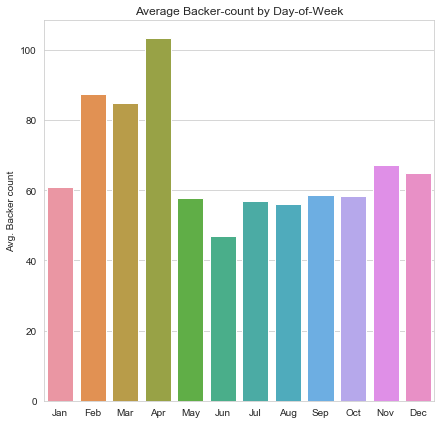

In [21]:
fig, ax = plt.subplots(figsize = (7, 7))

months_of_year = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns_plot = sns.barplot(x = 'month', y = 'backers', order = months_of_year, data=kickstarter_raw.loc[:,:], estimator = np.mean, ci=None)

# x-axis config
plt.xlabel('')

# y-axis config
plt.ylabel('Avg. Backer count')
#plt.yticks(np.arange(0, 130))

# general config
plt.title('Average Backer-count by Day-of-Week')

plt.show()

fig = sns_plot.get_figure()
fig.savefig("images/avg_backer_count_by_month_of_year.png")

April seems to be the best month for launching a campaign, it being the only month where average number of backers surpass the 100-mark.

Finally we take a look at Hour-of-day:

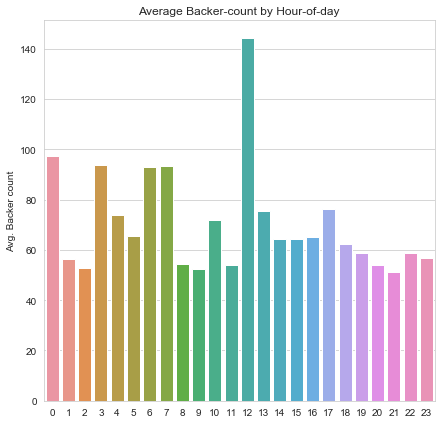

In [22]:
fig, ax = plt.subplots(figsize = (7, 7))

sns_plot = sns.barplot(x = 'hour', y = 'backers', data=kickstarter_raw.loc[:,:], estimator = np.mean, ci=None)

# x-axis config
plt.xlabel('')

# y-axis config
plt.ylabel('Avg. Backer count')
#plt.yticks(np.arange(0, 130))

# general config
plt.title('Average Backer-count by Hour-of-day')

plt.show()

fig = sns_plot.get_figure()
fig.savefig("images/avg_backer_count_by_hour_of_day.png")

Launching a project at 12pm GMT seems to yield the highest possible number of backers.

<img src="gmt_12pm.png" />

12pm GMT converts to 8am EST, which means campaigns timed to launch at the start-of-day in the U.S. market can stand to capture the largest number of backers possible. It could possibly be due to Kickstarter algorithm picking up new projects to be featured in email newsletters in the morning, hence getting a great outreach right at launch time that could contribute to high backer count.

## Conclusion

Key insights:
- Duration is not a factor in campaign success.
- Successful campaigns tend to set a goal of approximately $5,000.
- Dance, Theater and Arts project campaigns tend to enjoy higher rates of success compared to other categories. Fashion project campaigns have lowest success rate.
- Launch a campaign at start of week, preferably time it to coincide with start of day in the U.S. market.
- February to April (April being the best) is a good period in the year to launch campaigns.